In [2]:
import pandas as pd
from pathlib import Path
import json
import matplotlib.pyplot as plt

In [3]:
paths = Path("./").glob("*.json")
dfs = []
for path in paths:
    with open(path) as f:
        json_data = pd.json_normalize(json.loads(f.read()))
    dfs.append(json_data)
df = pd.concat(dfs, sort=False)
df.sort_values(by=['ts'], ascending=False, inplace=True)
df.head()

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
16761,2024-11-28T21:14:15Z,android,234467,DE,2003:e3:d700:3000:9ee1:786:d186:a1c1,A Hard Pill to Swallow,Arrested Youth,Too Late to Start Over,spotify:track:0B6E56bM9Z3jGLoEqz9rXe,None,None,None,trackdone,trackdone,True,False,False,1.732828e+09,False
16760,2024-11-28T21:10:20Z,android,229643,DE,2003:e3:d700:3000:9ee1:786:d186:a1c1,Walked Out in the Middle of the Night,Arrested Youth,Too Late to Start Over,spotify:track:1QbwTZs9Jgr70kdwvu0NNJ,None,None,None,trackdone,trackdone,True,False,False,1.732828e+09,False
16759,2024-11-28T21:06:30Z,android,203441,DE,2003:e3:d700:3000:9ee1:786:d186:a1c1,365,Arrested Youth,Too Late to Start Over,spotify:track:2aWzc7nvJkwpfJSwqKIVP5,None,None,None,trackdone,trackdone,True,False,False,1.732828e+09,False
16758,2024-11-28T21:03:04Z,android,202650,DE,2003:e3:d700:3000:9ee1:786:d186:a1c1,The Prime of My Life,Arrested Youth,Too Late to Start Over,spotify:track:19xSNoEtnEHetWnXlT6e3h,None,None,None,trackdone,trackdone,True,False,False,1.732828e+09,False
16757,2024-11-28T20:59:41Z,android,178013,DE,2003:e3:d700:3000:9ee1:786:d186:a1c1,Free Now,Arrested Youth,Too Late to Start Over,spotify:track:35R4uqcw0MscGaw05HcUWp,None,None,None,trackdone,trackdone,True,False,False,1.732827e+09,False


In [4]:
lifetime_ms_played = df["ms_played"].sum(numeric_only=True)
MS_TO_DAYS = 86_400_000
print(lifetime_ms_played / MS_TO_DAYS)


364.8760598148148


In [5]:
skipped_songs_df = df[df["skipped"] == True]
skipped_songs_df.head(20)


,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
16752,2024-11-28T20:43:12Z,android,60476,DE,2003:e3:d700:3000:9ee1:786:d186:a1c1,Walked Out in the Middle of the Night,Arrested Youth,Too Late to Start Over,spotify:track:1QbwTZs9Jgr70kdwvu0NNJ,None,None,None,trackdone,endplay,True,True,False,1.732825e+09,False
16739,2024-11-28T19:26:58Z,android,1979,DE,2003:e3:d700:3000:9f50:4c6a:edae:863e,Is It Too Late to Start Over,Arrested Youth,Too Late to Start Over,spotify:track:4RHC5Id0vsCjcQY5CFu41r,None,None,None,appload,endplay,True,True,False,1.732822e+09,False
16726,2024-11-28T16:24:16Z,android,766,DE,2a00:20:7049:e9fb:1ff2:51d4:45b8:d5b,All the Way 'til Next Year,Arrested Youth,Too Late to Start Over,spotify:track:5gLe7CUKHLdIAAwwHjgk3S,None,None,None,fwdbtn,fwdbtn,True,True,False,1.732811e+09,False
16727,2024-11-28T16:24:16Z,android,3576,DE,2a00:20:7049:e9fb:1ff2:51d4:45b8:d5b,It's My Life I'm Taking It Back,Arrested Youth,Too Late to Start Over,spotify:track:2NHLwxEFJCvRP2KeUgMXPT,None,None,None,appload,fwdbtn,True,True,False,1.732811e+09,False
16721,2024-11-28T13:33:48Z,osx,4331,DE,80.83.103.101,A Hard Pill to Swallow,Arrested Youth,Too Late to Start Over,spotify:track:0B6E56bM9Z3jGLoEqz9rXe,None,None,None,trackdone,endplay,True,True,False,1.732801e+09,False
16707,2024-11-28T12:45:03Z,osx,80202,DE,80.83.103.101,Weird Kid,Little Dume,Don't Calm Your Waters,spotify:track:3IJNMS5I8xArSwQ3aUh7iw,None,None,None,trackdone,endplay,True,True,False,1.732789e+09,False
16691,2024-11-28T09:23:05Z,osx,31720,DE,80.83.103.101,Silent Screaming,Arrested Youth,Too Late to Start Over,spotify:track:7y25gNG0AqMhNjUYZxx1k4,None,None,None,trackdone,endplay,True,True,False,1.732786e+09,False
16689,2024-11-28T09:19:10Z,osx,2495,DE,80.83.103.101,Walked Out in the Middle of the Night,Arrested Youth,Too Late to Start Over,spotify:track:1QbwTZs9Jgr70kdwvu0NNJ,None,None,None,clickrow,endplay,False,True,False,1.732786e+09,False
16688,2024-11-28T09:19:07Z,osx,24480,DE,80.83.103.101,A Painting in Paris,Arrested Youth,Fear,spotify:track:4ytlkHbkpwhUCnSQnUrGmf,None,None,None,trackdone,endplay,False,True,False,1.732786e+09,False
16682,2024-11-28T09:01:21Z,osx,1956,DE,80.83.103.101,Is It Too Late to Start Over,Arrested Youth,Too Late to Start Over,spotify:track:4RHC5Id0vsCjcQY5CFu41r,None,None,None,trackdone,endplay,False,True,False,1.732784e+09,False


<Figure size 1500x1000 with 0 Axes>

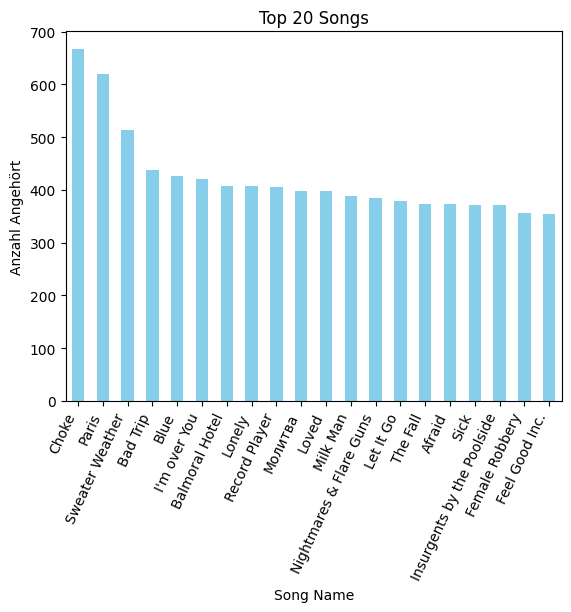

In [6]:
song_counts = df['master_metadata_track_name'].value_counts()

song_counts_df = song_counts.reset_index()
song_counts_df.columns = ['Song_Name', 'Count']

# Optional: Visualisierung als Balkendiagramm
plt.figure(figsize=(15, 10))
song_counts_df.head(20).plot(kind='bar', x='Song_Name', y='Count', legend=False, color='skyblue')
plt.title('Top 20 Songs')
plt.xlabel('Song Name')
plt.ylabel('Anzahl Angehört')
plt.xticks(rotation=65, ha='right')
plt.show()

<Figure size 1500x1000 with 0 Axes>

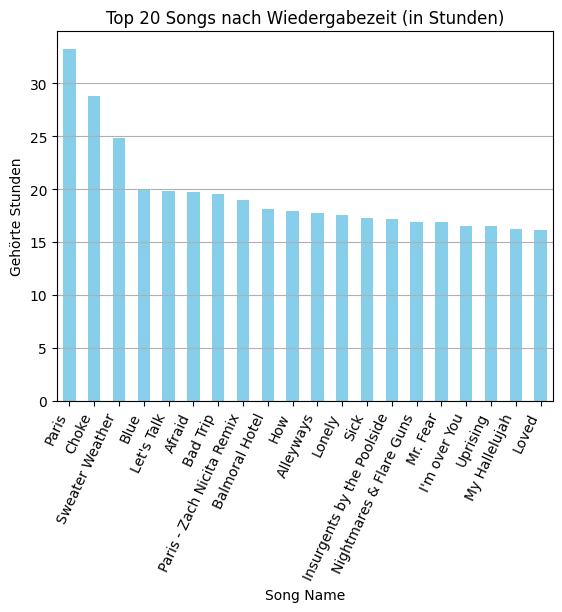

In [7]:
# Konvertiere 'ms_played' in Stunden und füge eine neue Spalte hinzu
df['Gehörte_Stunden'] = df['ms_played'] / 3_600_000  # 1 Stunde = 3.600.000 Millisekunden

# Gruppiere nach Song-Namen und summiere die gehörten Stunden
song_zeit = df.groupby('master_metadata_track_name')['Gehörte_Stunden'].sum().sort_values(ascending=False)

# Erstelle ein DataFrame für die Visualisierung
song_zeit_df = song_zeit.reset_index()
song_zeit_df.columns = ['Song_Name', 'Total_Hours']

# Optional: Visualisierung der Top 20 Songs
plt.figure(figsize=(15, 10))
song_zeit_df.head(20).plot(kind='bar', x='Song_Name', y='Total_Hours', legend=False, color='skyblue')
plt.title('Top 20 Songs nach Wiedergabezeit (in Stunden)')
plt.xlabel('Song Name')
plt.ylabel('Gehörte Stunden')
plt.xticks(rotation=65, ha='right')
plt.grid(axis='y')
plt.show()


<Figure size 1500x1000 with 0 Axes>

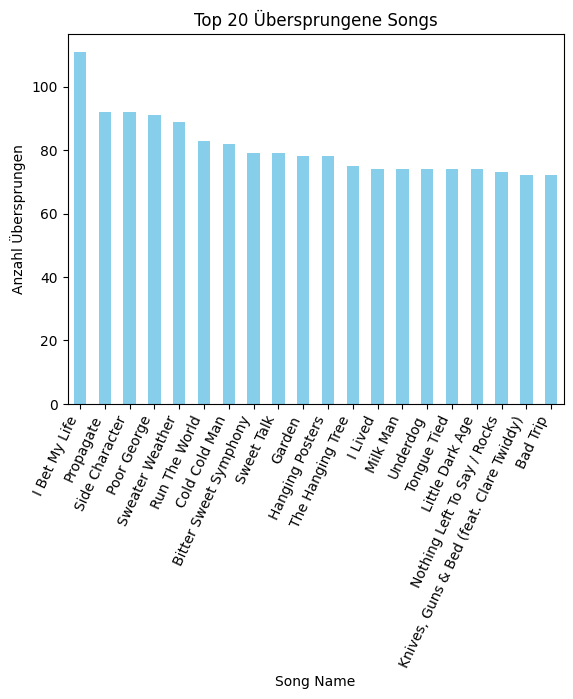

In [8]:
song_counts = skipped_songs_df['master_metadata_track_name'].value_counts()

song_counts_df = song_counts.reset_index()
song_counts_df.columns = ['Song_Name', 'Count']

# Optional: Visualisierung als Balkendiagramm
plt.figure(figsize=(15, 10))
song_counts_df.head(20).plot(kind='bar', x='Song_Name', y='Count', legend=False, color='skyblue')
plt.title('Top 20 Übersprungene Songs')
plt.xlabel('Song Name')
plt.ylabel('Anzahl Übersprungen')
plt.xticks(rotation=65, ha='right')
plt.show()

<Figure size 1500x1000 with 0 Axes>

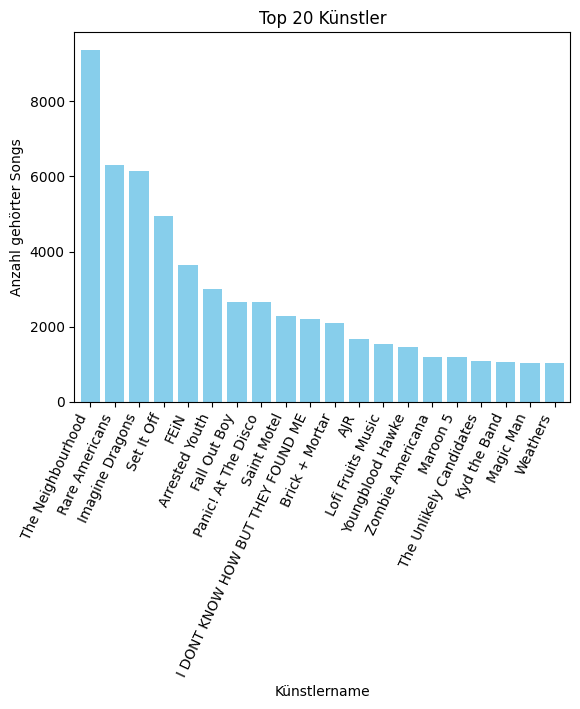

In [9]:
# top artists lifetime

artist_counts = df['master_metadata_album_artist_name'].value_counts()

artist_counts_df = artist_counts.reset_index()
artist_counts_df.columns = ['Artist_Name', 'Count']

# Optional: Visualisierung als Balkendiagramm
plt.figure(figsize=(15, 10))
artist_counts_df.head(20).plot(kind='bar', x='Artist_Name', y='Count', legend=False, color='skyblue', width=0.8)
plt.title('Top 20 Künstler')
plt.xlabel('Künstlername')
plt.ylabel('Anzahl gehörter Songs')
plt.xticks(rotation=65, ha='right')
plt.show()

<Figure size 1200x800 with 0 Axes>

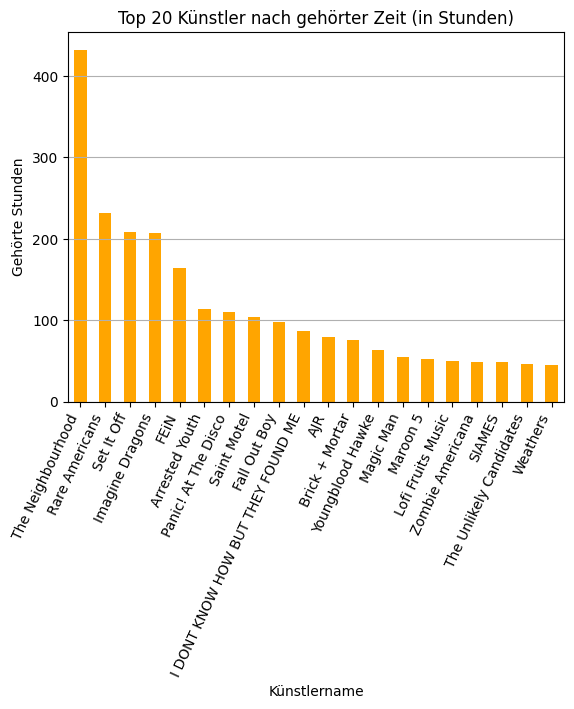

In [10]:
# TODO: top artists pro jahr
df['Gehörte_Stunden'] = df['ms_played'] / 3_600_000  # 1 Stunde = 3.600.000 Millisekunden

# Gruppieren nach Künstler und Summieren der gehörten Stunden
kuenstler_zeit = df.groupby('master_metadata_album_artist_name')['Gehörte_Stunden'].sum().sort_values(ascending=False)

# DataFrame erstellen für bessere Übersicht
kuenstler_zeit_df = kuenstler_zeit.reset_index()
kuenstler_zeit_df.columns = ['Artist_Name', 'Total_Hours']

# Visualisierung der Top 20 Künstler nach gehörter Zeit
plt.figure(figsize=(12, 8))
kuenstler_zeit_df.head(20).plot(kind='bar', x='Artist_Name', y='Total_Hours', legend=False, color='orange')
plt.title('Top 20 Künstler nach gehörter Zeit (in Stunden)')
plt.xlabel('Künstlername')
plt.ylabel('Gehörte Stunden')
plt.xticks(rotation=65, ha='right')
plt.grid(axis='y')
plt.show()

/var/folders/y3/ptpqqzqn1ss9f244m2l61ws00000gn/T/ipykernel_2339/3852685883.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Monat_Jahr'] = df['ts'].dt.to_period('M')


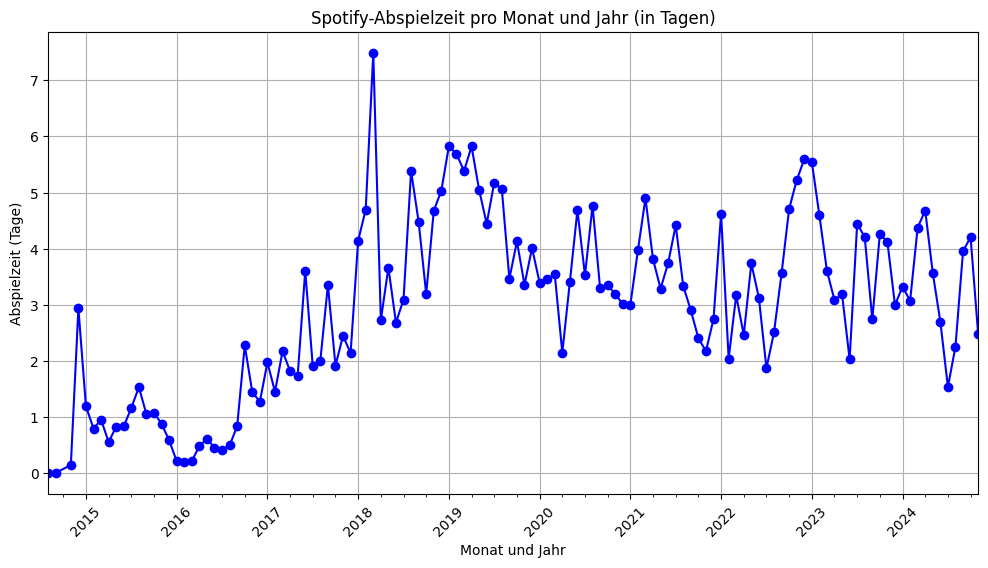

In [11]:
df['ts'] = pd.to_datetime(df['ts'])  

# Erstelle eine neue Spalte, die Monat und Jahr kombiniert
df['Monat_Jahr'] = df['ts'].dt.to_period('M')

# Konvertiere die Abspielzeit von Millisekunden zu Stunden (ersetze 'abspielzeit_spalte' durch den tatsächlichen Namen)
df['Abspielzeit_Stunden'] = df['ms_played'] / MS_TO_DAYS  

# Gruppiere nach 'Monat_Jahr' und summiere die Abspielzeit pro Monat
monatliche_abspielzeit = df.groupby('Monat_Jahr')['Abspielzeit_Stunden'].sum()

# Visualisierung der Abspielzeit
plt.figure(figsize=(12, 6))
monatliche_abspielzeit.plot(kind='line', marker='o', color='blue')
plt.title('Spotify-Abspielzeit pro Monat und Jahr (in Tagen)')
plt.xlabel('Monat und Jahr')
plt.ylabel('Abspielzeit (Tage)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# IDEAS
- Wie viele einzigartige Songs
- Wie viele neue Songs pro Jahr/Monat

In [12]:
# Wie viele einzigartige songs
unique_songs_df = df.drop_duplicates(subset="master_metadata_track_name")
len(unique_songs_df)

14165

Jahr
2014     187
2015     699
2016    1033
2017    2292
2018    3800
2019    2838
2020    2810
2021    2806
2022    3553
2023    3140
2024    2510
Name: master_metadata_track_name, dtype: int64


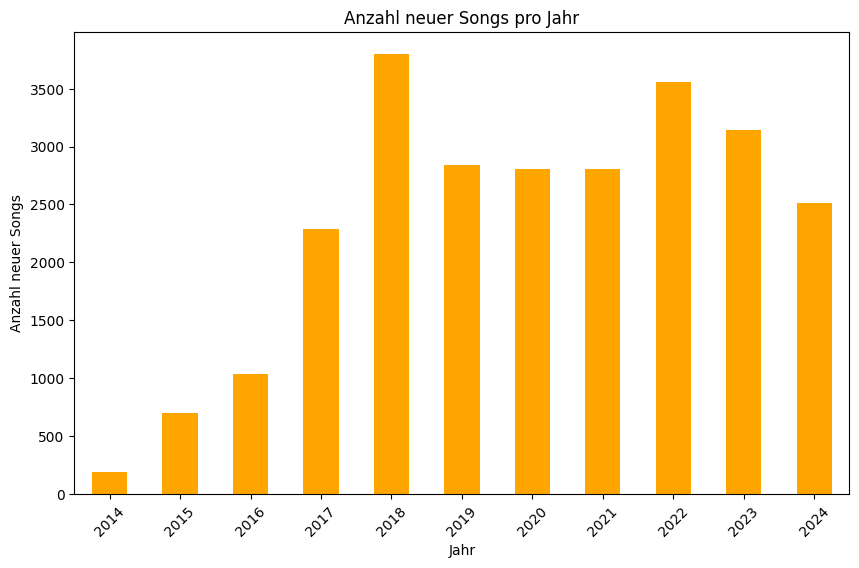

In [13]:
# Jahr extrahieren
df['Jahr'] = df['ts'].dt.year

# Entfernen von Duplikaten: Jeder Song zählt nur einmal pro Jahr
einzigartige_songs_pro_jahr = df.drop_duplicates(subset=['Jahr', 'master_metadata_track_name'])

# Anzahl der einzigartigen Songs pro Jahr berechnen
neue_songs_pro_jahr = einzigartige_songs_pro_jahr.groupby('Jahr')['master_metadata_track_name'].count()

# Ausgabe
print(neue_songs_pro_jahr)

plt.figure(figsize=(10, 6))
neue_songs_pro_jahr.plot(kind='bar', color='orange')
plt.title('Anzahl neuer Songs pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Anzahl neuer Songs')
plt.xticks(rotation=45)
plt.show()

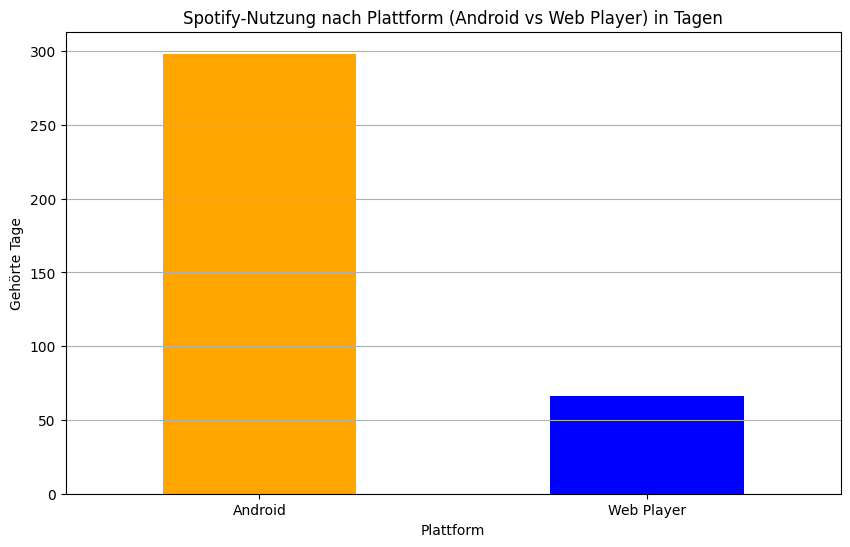

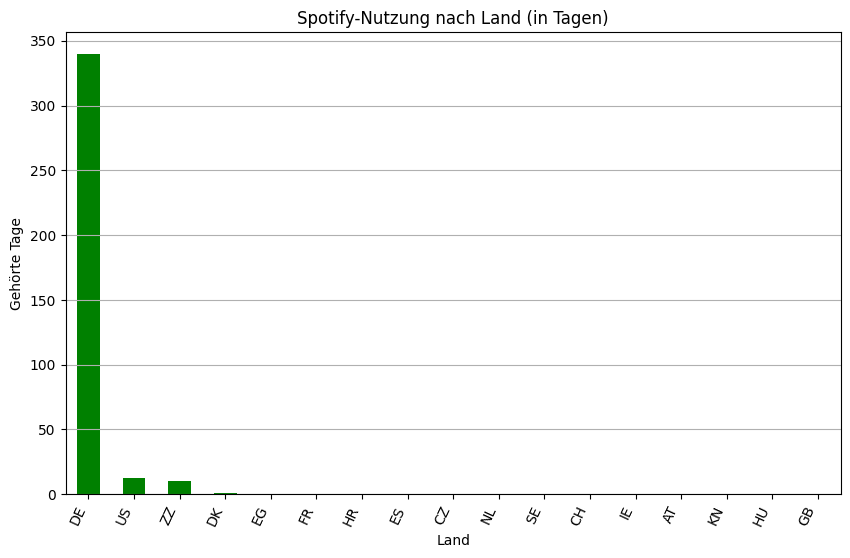

In [14]:
# Konvertiere 'ms_played' in Tage (1 Tag = 86.400.000 Millisekunden)
df['Gehörte_Tage'] = df['ms_played'] / MS_TO_DAYS  # 1 Tag = 86.400.000 Millisekunden

# ------------------- Plattform-Gruppierung -------------------
# Gruppiere Plattformen nach 'Android' und 'Web Player' (alles andere)
df['Plattform_Gruppiert'] = df['platform'].apply(lambda x: 'Android' if 'android' in x.lower() else 'Web Player')

# Gruppiere nach der neuen Spalte und summiere die gehörte Zeit in Tagen
plattform_zeit = df.groupby('Plattform_Gruppiert')['Gehörte_Tage'].sum().sort_values(ascending=False)

# Visualisierung der gruppierten Plattform-Nutzung
plt.figure(figsize=(10, 6))
plattform_zeit.plot(kind='bar', color=['orange', 'blue'])
plt.title('Spotify-Nutzung nach Plattform (Android vs Web Player) in Tagen')
plt.xlabel('Plattform')
plt.ylabel('Gehörte Tage')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# ------------------- Länder-Analyse -------------------
# Gruppiere nach Land und summiere die gehörte Zeit in Tagen
land_zeit = df.groupby('conn_country')['Gehörte_Tage'].sum().sort_values(ascending=False)

# Visualisierung der Länder-Nutzung
plt.figure(figsize=(10, 6))
land_zeit.plot(kind='bar', color='green')
plt.title('Spotify-Nutzung nach Land (in Tagen)')
plt.xlabel('Land')
plt.ylabel('Gehörte Tage')
plt.xticks(rotation=65, ha='right')
plt.grid(axis='y')
plt.show()

/var/folders/y3/ptpqqzqn1ss9f244m2l61ws00000gn/T/ipykernel_2339/3490197204.py:49: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Monat_Jahr'] = df['ts'].dt.to_period('M')
/var/folders/y3/ptpqqzqn1ss9f244m2l61ws00000gn/T/ipykernel_2339/3490197204.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_kuenstler_zeit['Monat_Jahr'] = top_5_kuenstler_zeit['Monat_Jahr'].dt.to_timestamp()


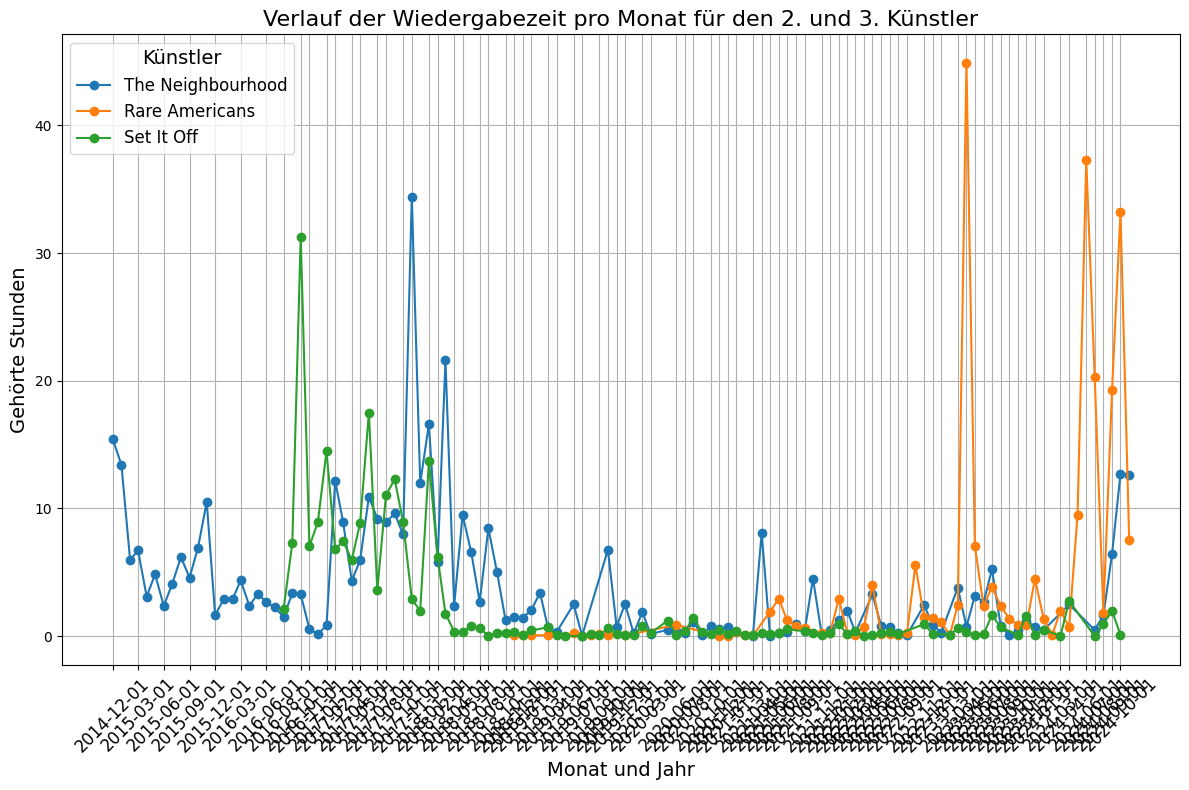

In [15]:
# Konvertiere 'ms_played' in Stunden
# df['Gehörte_Stunden'] = df['ms_played'] / 3_600_000  # 1 Stunde = 3.600.000 Millisekunden

# # Erstelle eine Spalte für den Monat und Jahr (als Datetime)
# df['Monat_Jahr'] = df['ts'].dt.to_period('M')

# # Gruppiere nach Künstler und Monat und summiere die gehörte Zeit in Stunden
# kuenstler_monatliche_zeit = df.groupby(['Monat_Jahr', 'master_metadata_album_artist_name'])['Gehörte_Stunden'].sum().reset_index()

# # Top 5 Künstler nach gesamter Wiedergabezeit berechnen
# gesamt_zeit_kuenstler = df.groupby('master_metadata_album_artist_name')['Gehörte_Stunden'].sum()
# top_5_kuenstler = gesamt_zeit_kuenstler.nlargest(5).index

# # Filtere die Daten für die Top 2 und 3 Künstler
# top_5_kuenstler_zeit = kuenstler_monatliche_zeit[kuenstler_monatliche_zeit['master_metadata_album_artist_name'].isin(top_5_kuenstler)]

# # Stelle sicher, dass die Daten nach Monat/Jahr sortiert sind
# top_5_kuenstler_zeit['Monat_Jahr'] = top_5_kuenstler_zeit['Monat_Jahr'].dt.to_timestamp()  # Konvertiere Perioden in Timestamp
# top_5_kuenstler_zeit = top_5_kuenstler_zeit.sort_values(by=['Monat_Jahr'])

# # Visualisierung: Verlauf der Wiedergabezeit pro Monat für den zweiten und dritten Künstler
# plt.figure(figsize=(12, 8))

# # Für jeden der Top 2 und 3 Künstler eine Linie im Plot zeichnen
# for artist in top_5_kuenstler:
#     artist_data = top_5_kuenstler_zeit[top_5_kuenstler_zeit['master_metadata_album_artist_name'] == artist]
#     plt.plot(artist_data['Monat_Jahr'], artist_data['Gehörte_Stunden'], marker='o', label=artist)

# plt.title('Verlauf der Wiedergabezeit pro Monat für Top 5 Künstler')
# plt.xlabel('Monat und Jahr')
# plt.ylabel('Gehörte Stunden')
# plt.xticks(rotation=45, fontsize=12)
# plt.xticks(top_5_kuenstler['Monat_Jahr'][::3].astype(str), rotation=45)

# # Verkleinerte Legende und Achsenbeschriftungen
# plt.legend(title='Künstler', fontsize=12, title_fontsize=14)

# # Optimierung der Layouts
# plt.tight_layout()

# # Grid und Anzeige des Plots
# plt.grid(True)
# plt.show()


# Beispielhafte Berechnung der 'Monat_Jahr' Spalte und der 'Gehörte_Stunden' für jeden Künstler
# Verwendet df mit den richtigen Spalten
df['Gehörte_Stunden'] = df['ms_played'] / 3_600_000  # ms in Stunden umrechnen
df['Monat_Jahr'] = df['ts'].dt.to_period('M')

# Gruppiere nach Monat und Künstler und berechne die gehörte Zeit
kuenstler_monatliche_zeit = df.groupby(['Monat_Jahr', 'master_metadata_album_artist_name'])['Gehörte_Stunden'].sum().reset_index()

# Top 5 Künstler nach gesamter Wiedergabezeit berechnen
gesamt_zeit_kuenstler = df.groupby('master_metadata_album_artist_name')['Gehörte_Stunden'].sum()
top_5_kuenstler = gesamt_zeit_kuenstler.nlargest(3).index


top_5_kuenstler_zeit = kuenstler_monatliche_zeit[kuenstler_monatliche_zeit['master_metadata_album_artist_name'].isin(top_5_kuenstler)]

# Stelle sicher, dass 'Monat_Jahr' als Timestamp vorliegt
top_5_kuenstler_zeit['Monat_Jahr'] = top_5_kuenstler_zeit['Monat_Jahr'].dt.to_timestamp()

# Sortiere nach 'Monat_Jahr'
top_5_kuenstler_zeit = top_5_kuenstler_zeit.sort_values(by=['Monat_Jahr'])

# Visualisierung: Verlauf der Wiedergabezeit pro Monat für die Top 2 und 3 Künstler
plt.figure(figsize=(12, 8))

# Für jeden der Top 2 und 3 Künstler eine Linie im Plot zeichnen
for artist in top_5_kuenstler:
    artist_data = top_5_kuenstler_zeit[top_5_kuenstler_zeit['master_metadata_album_artist_name'] == artist]
    plt.plot(artist_data['Monat_Jahr'], artist_data['Gehörte_Stunden'], marker='o', label=artist)

# Titel und Achsenbeschriftungen
plt.title('Verlauf der Wiedergabezeit pro Monat für den 2. und 3. Künstler', fontsize=16)
plt.xlabel('Monat und Jahr', fontsize=14)
plt.ylabel('Gehörte Stunden', fontsize=14)

# Reduziere die Markierungen auf der x-Achse (z.B. nur alle 3 Monate anzeigen)
plt.xticks(rotation=45, fontsize=12)
plt.xticks(top_5_kuenstler_zeit['Monat_Jahr'][::3].astype(str), rotation=45)

# Verkleinerte Legende und Achsenbeschriftungen
plt.legend(title='Künstler', fontsize=12, title_fontsize=14)

# Optimierung der Layouts
plt.tight_layout()

# Grid und Anzeige des Plots
plt.grid(True)
plt.show()

/var/folders/y3/ptpqqzqn1ss9f244m2l61ws00000gn/T/ipykernel_2339/3627439936.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Monat_Jahr'] = df['ts'].dt.to_period('M')
/var/folders/y3/ptpqqzqn1ss9f244m2l61ws00000gn/T/ipykernel_2339/3627439936.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_kuenstler_pro_monat = kuenstler_monatliche_zeit.groupby('Monat_Jahr').apply(
/var/folders/y3/ptpqqzqn1ss9f244m2l61ws00000gn/T/ipykernel_2339/3627439936.py:35: UserWarning: Glyph 35199 (\N{CJK UNIFIED IDEOGRAPH-897F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/y3/ptpqqzqn1ss9f244m2l61ws00000gn/T/ipykernel_2339/3627439936.py:

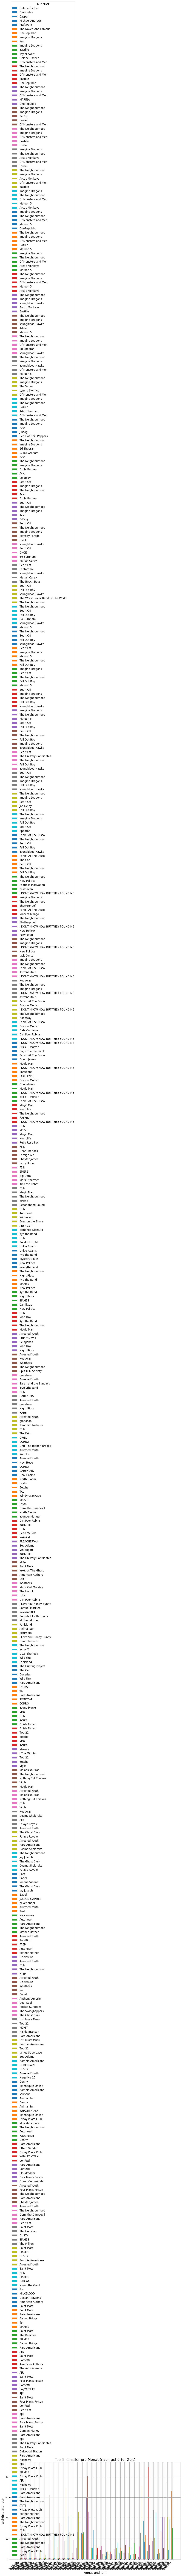

In [16]:
# Konvertiere 'ms_played' in Stunden
df['Gehörte_Stunden'] = df['ms_played'] / 3_600_000  # 1 Stunde = 3.600.000 Millisekunden

# Erstelle eine Spalte für den Monat und Jahr (als Perioden)
df['Monat_Jahr'] = df['ts'].dt.to_period('M')

# Gruppiere nach Monat und Künstler und summiere die gehörte Zeit in Stunden
kuenstler_monatliche_zeit = df.groupby(['Monat_Jahr', 'master_metadata_album_artist_name'])['Gehörte_Stunden'].sum().reset_index()

# Top 5 Künstler pro Monat
top_5_kuenstler_pro_monat = kuenstler_monatliche_zeit.groupby('Monat_Jahr').apply(
    lambda x: x.nlargest(5, 'Gehörte_Stunden')
).reset_index(drop=True)

# Visualisierung als Bar Chart
plt.figure(figsize=(14, 8))

# Erstelle ein gestapeltes Balkendiagramm für jedes Monat
for month in top_5_kuenstler_pro_monat['Monat_Jahr'].unique():
    data = top_5_kuenstler_pro_monat[top_5_kuenstler_pro_monat['Monat_Jahr'] == month]
    plt.bar(data['Monat_Jahr'].astype(str), data['Gehörte_Stunden'], 
            label=data['master_metadata_album_artist_name'], 
            width=0.5)

# Achsentitel und Plot-Titel
plt.title('Top 5 Künstler pro Monat (nach gehörter Zeit)', fontsize=16)
plt.xlabel('Monat und Jahr', fontsize=14)
plt.ylabel('Gehörte Stunden', fontsize=14)

# Verkleinerung der Beschriftungen auf der x-Achse, um Überlappungen zu vermeiden
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title="Künstler", fontsize=12, title_fontsize=14)

# Optimierung der Layouts
plt.tight_layout()

# Grid und Anzeige des Plots
plt.grid(True)
plt.show()